In [64]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
dtypes = {'Ycity': 'str', 'Illnesses': 'int', 'PASSENGERS': 'int', 'perNoYrly': 'float', 'DENSITY': 'float', 'POP':'int'}
data=pd.read_csv("FinalProject\\data\\datatotest.csv", encoding="utf-8",usecols=['Ycity','Illnesses','PASSENGERS','perNoYrly','DENSITY','POP'], dtype=dtypes)
data2=data[['Illnesses','PASSENGERS','perNoYrly','DENSITY','POP']].copy()
data2 =data2[data2.PASSENGERS != 0]
data2.reset_index(drop=True, inplace=True)
data2.info()
data2.head()

data3=data[['Ycity','DENSITY','POP']].copy()
data3.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
Illnesses     126 non-null int32
PASSENGERS    126 non-null int32
perNoYrly     126 non-null float64
DENSITY       126 non-null float64
POP           126 non-null int32
dtypes: float64(2), int32(3)
memory usage: 3.5 KB


In [77]:
data3.reset_index(drop=True, inplace=True)
data3=data3.sort_values(by='DENSITY', ascending=False)
data4=data3[['DENSITY','POP']].copy()
data3.head(50)

,Ycity,DENSITY,POP
0,"Union City, NJ",53239.686849,68520
1,"New York, NY",27960.865491,8398748
2,"Passaic, NJ",22326.607741,69948
3,"Somerville, MA",19776.597958,81562
4,"San Francisco, CA",18848.498575,883305
5,"Cambridge, MA",18610.472477,118977
6,"Jersey City, NJ",18011.188484,265549
7,"Paterson, NJ",17309.320241,145627
8,"Mount Vernon, NY",15417.560565,67593
9,"Lynwood, CA",14566.818879,70504


In [71]:
X = data4.to_numpy()

In [72]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=126)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)
predicted_clusters

array([ 37,   2, 106, 104,  35,  52,  63,  76,  53,  53, 113,  51, 119,
        51,  77,  58,  73,  67,  98, 119,  58,  12,  16,  88,  98,  51,
        22,  73, 114,  51,  70,  51,  53,  58,  64,  99, 107,  94,  58,
        49, 123,  77,  58, 103,  78, 105,  34,  58,  64,  84,   1, 123,
       123, 123, 103,  29, 101,  11,  29,  84, 101,  84,  80, 110, 103,
        84,  64,  78,  87, 107,  39, 107, 100, 101,  87, 105, 100, 100,
        64, 110,  83,  23,  78, 103, 105,  78,  43,  30,  81,  18,  95,
        84, 101,  75,  19,  11,  95,  78, 100,   5,  79,  44,  83,  84,
        81,  95,  17,  95,  49,  24, 101,  60,  18,  95,   0, 116,  30,
       105,  17, 116,  14,   0, 121,  79,   3,  78, 100, 122,   0, 111,
        95,  68,  13, 121,  71,  68,  66,  59,  38,  68, 109,  95, 115,
       110,  95,  41,  30,  59, 110,  85,   0,   7,  26,  87,  95,  81,
        28, 116, 115,  81,  69,  72, 102,  85,  38,  20,  87,  13,  93,
        85,  42,  46, 121,  49, 112,  13,  89,  97,  95, 118, 11

In [73]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=126)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centers = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
# From Scratch
print(centers) # From sci-kit learn


[[2.25139009e+03 1.38414333e+05]
 [8.51455873e+03 3.99045600e+06]
 [2.79608655e+04 8.39874800e+06]
 [2.62202511e+03 8.69811500e+05]
 [1.18014216e+04 1.58413800e+06]
 [3.24611677e+03 2.41853200e+05]
 [3.65099284e+03 2.32550200e+06]
 [2.99231377e+03 5.60218000e+05]
 [2.68750950e+03 8.47302143e+04]
 [1.83957825e+03 4.50189000e+05]
 [1.19013702e+04 2.70599400e+06]
 [8.88325444e+03 7.44955000e+05]
 [3.41199965e+03 1.92181667e+05]
 [2.43661656e+03 3.74114000e+05]
 [3.96042537e+03 1.34504700e+06]
 [2.58767303e+03 1.04168429e+05]
 [3.12803471e+03 6.70857500e+05]
 [1.80111885e+04 2.65549000e+05]
 [5.81648675e+03 1.03011900e+06]
 [3.48821453e+03 2.85936750e+05]
 [3.29924789e+03 6.64930000e+04]
 [2.73975634e+03 1.67470600e+05]
 [4.64290399e+03 3.09754333e+05]
 [2.71445505e+03 1.17125750e+05]
 [4.44285880e+03 5.08743500e+05]
 [4.37967120e+03 1.42597600e+06]
 [4.44913916e+03 2.15247250e+05]
 [7.44317088e+03 6.02495000e+05]
 [3.20719933e+03 1.66027200e+06]
 [3.00591198e+03 9.64254000e+05]
 [1.149011

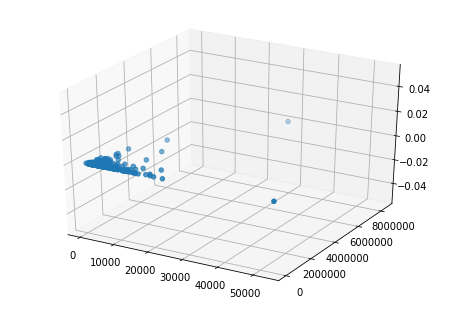

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])


In [79]:
# 37,   2, 106, 104,  35,  52

data3.iloc[106] 
#data2.iloc[89]

Ycity      Fort Lauderdale, FL
DENSITY                5279.47
POP                     182595
Name: 106, dtype: object